First notebook file for the project

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from scipy.optimize import curve_fit
from scipy import optimize
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import random

In [2]:
newTemps=[]
a=[]
b=[]
c=[]
a+=[2016]
a+=[9.44]
b+=[2017]
b+=[9.34]
c+=[2018]
c+=[9.62]
newTemps.append(a)
newTemps.append(b)
newTemps.append(c)
newTemps
arr3 = np.array(newTemps)
a3=pd.DataFrame(arr3)
b3=a3.set_index(0)




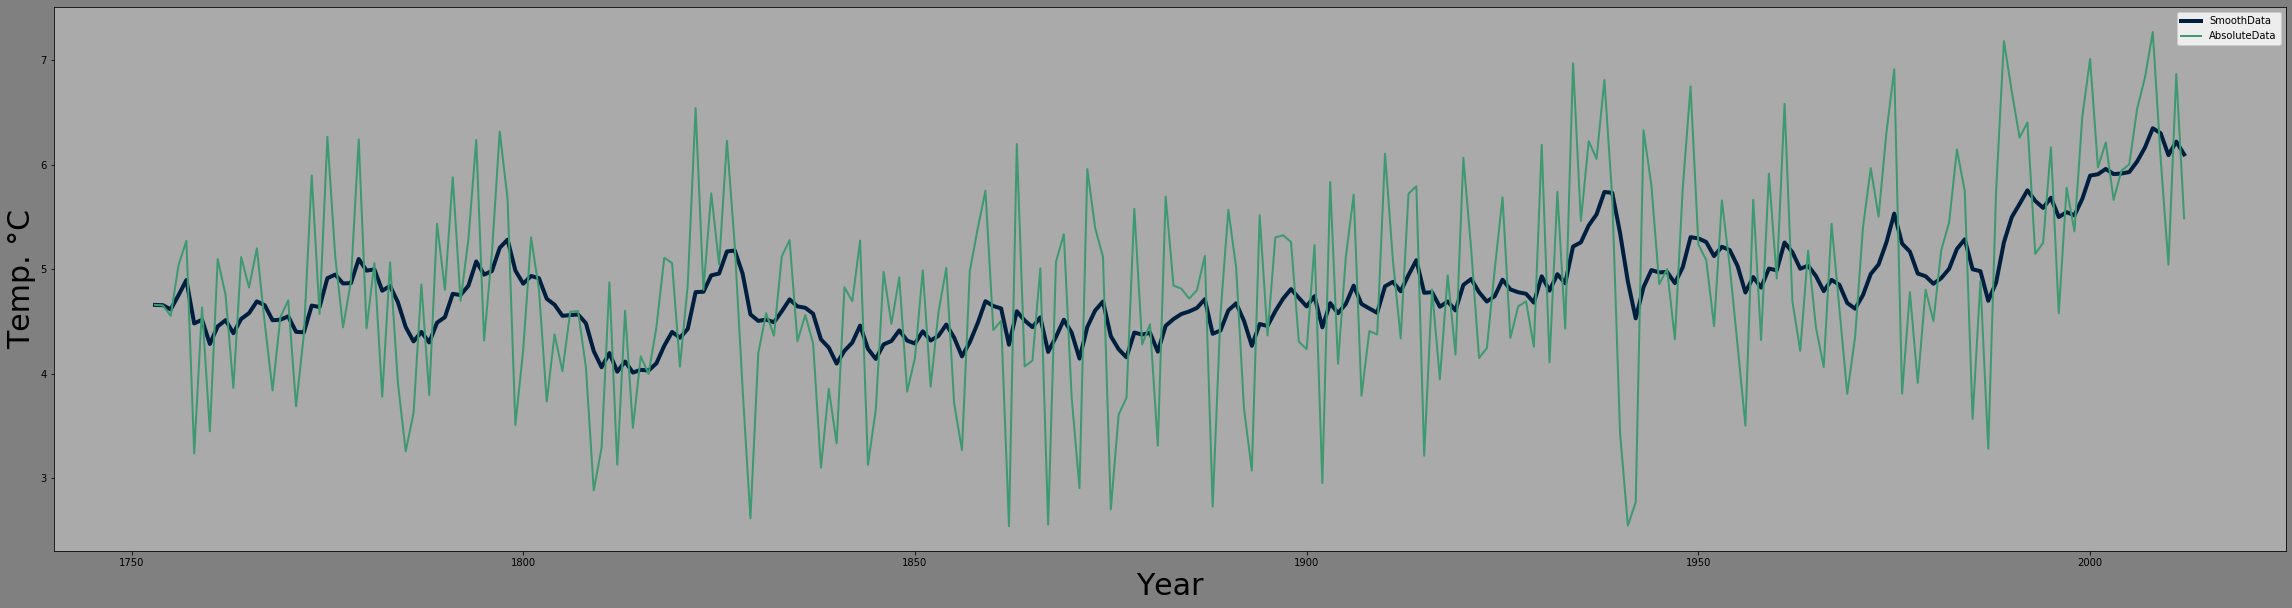

Index(['AverageTemperature'], dtype='object')

In [3]:
#Absolute temperatures, annual readings for Estonia
data_abs_est = pd.read_csv("Estonia.csv",index_col=1, header=0,  parse_dates=True, squeeze=True)
data_est1=data_abs_est.drop(["Unnamed: 0","AverageTemperatureUncertainty","Country"], axis=1)
data_est=data_est1[2:3122]
data_est_year = data_est.groupby([data_est.index.year]).mean()
data_smooth=data_est_year.ewm(com=5).mean()
plt.figure(figsize=(40,10),facecolor="gray")
ax=plt.axes()
ax.set_facecolor("#AAAAAA")
plt.plot(data_smooth,"#001f3f",linewidth=4,label="SmoothData")
plt.plot(data_est_year,"#3D9970" ,linewidth=2,label="AbsoluteData")
plt.legend()
plt.xlabel("Year",fontsize=30)
plt.ylabel("Temp. °C",fontsize=30)
plt.show()
data_smooth.columns






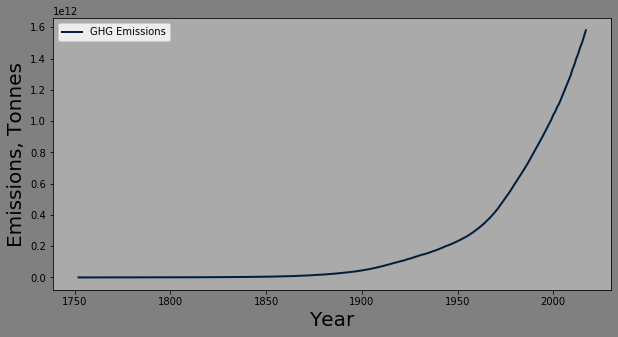

In [4]:
#data_emissions=pd.read_csv("emission data.csv")
#world_emissions1=data_emissions[data_emissions["Country"]=="World"]
#world_emissions2=world_emissions1.transpose()
#world_emissions=world_emissions2[2::]
#a=world_emissions.reset_index()
#a.to_csv("emissions.csv")
data_emissions = pd.read_csv("emissions.csv",index_col=1, header=0)
world_emissions=data_emissions.drop("Unnamed: 0",axis=1)
world_emissions


plt.figure(figsize=(10,5),facecolor="gray")
ax=plt.axes()
ax.set_facecolor("#AAAAAA")
plt.plot(world_emissions,"#001f3f",linewidth=2,label="GHG Emissions")
plt.xlabel("Year",fontsize=20)
plt.ylabel("Emissions, Tonnes",fontsize=20)
plt.legend()
plt.show()





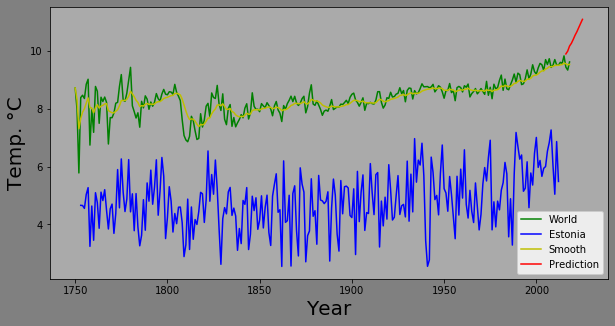

In [38]:
#Absolute temperatures annual global readings
data_absolute=pd.read_csv("GlobalTemperatures.csv",index_col=0, header=0,  parse_dates=True)
data_absolute_1=data_absolute.drop(["LandAverageTemperatureUncertainty","LandMaxTemperature","LandMaxTemperatureUncertainty",
"LandMinTemperature","LandMinTemperatureUncertainty","LandAndOceanAverageTemperature","LandAndOceanAverageTemperatureUncertainty"],axis=1)
data_absolute_1.head()
data_absolute_2=data_absolute.drop(["LandAverageTemperature","LandMaxTemperature","LandMaxTemperatureUncertainty",
"LandMinTemperature","LandMinTemperatureUncertainty","LandAndOceanAverageTemperature","LandAndOceanAverageTemperatureUncertainty"],axis=1)
data_absolute_year = data_absolute_1.groupby([data_absolute_1.index.year]).mean()
data_absolute_year.loc[2016] = [9.44]
data_absolute_year.loc[2017] = [9.34]
data_absolute_year.loc[2018] = [9.62]
data_smooth=data_absolute_year.ewm(com=5).mean()
data_absolute_year_uncertainty = data_absolute_2.groupby([data_absolute_1.index.year]).mean()
plt.figure(figsize=(10,5),facecolor="gray")
ax=plt.axes()
ax.set_facecolor("#AAAAAA")
ax.plot(data_absolute_year,"-g", label="World")
ax.plot(data_est_year,"-b",label="Estonia")
ax.plot(data_smooth,"-y",label="Smooth")
ax.plot(b,"-r",label="Prediction")
plt.xlabel("Year",fontsize=20)
plt.ylabel("Temp. °C",fontsize=20)
ax.legend(loc=4)


plt.show()




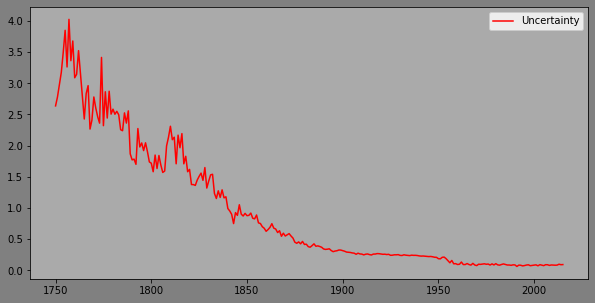

In [6]:
plt.figure(figsize=(10,5),facecolor="gray")
ax=plt.axes()
ax.set_facecolor("#AAAAAA")
ax.plot(data_absolute_year_uncertainty,"-r",label="Uncertainty")
ax.legend(loc=1)

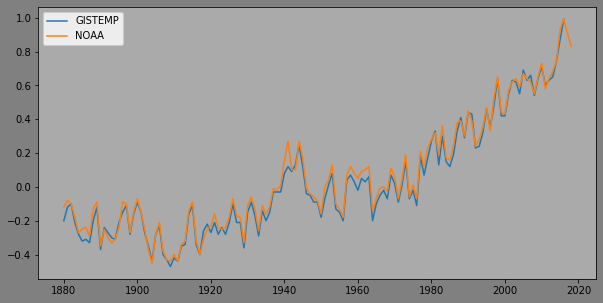

In [7]:
#Temperature variations - temperature readings like these correspond to how different the reading was when compared
#to global average for the years 1900-2000
#Annual readings, 2 independent sources: GISTEMP and NOAA
var_annual=pd.read_csv("annual_csv.csv",index_col=1, header=0)
data_variations_annual=var_annual.iloc[::-1]
data_variations_annual.head()
data_variations_GISTEMP=data_variations_annual[data_variations_annual["Source"]=="GISTEMP"]
data_variations_NOAA=pd.read_csv("data-NOAA.csv",index_col=0, header=0)
data_var_GISTEMP=data_variations_GISTEMP.drop("Source",axis=1)


plt.figure(figsize=(10,5),facecolor="gray")
ax=plt.axes()
ax.set_facecolor("#AAAAAA")
ax.plot(data_var_GISTEMP,label="GISTEMP")
ax.plot(data_variations_NOAA,label="NOAA")
plt.legend()
plt.show()


In [8]:
#ARIMA model
#autocorrelation_plot(data_var_GCAG)
#model=ARIMA(data_est_year,order=(5,1,1))
#model_fit=model.fit(disp=0)
#print(model_fit.summary())
#residuals = pd.DataFrame(model_fit.resid)
#residuals.plot()
#plt.show()
#residuals.plot(kind='kde')
#plt.show()
#print(residuals.describe())

#X = data_est_year.values
#size = int(len(X) * 0.66)
#train, test = X[0:size], X[size:len(X)]
#history = [x for x in train]
#predictions = list()
#for t in range(len(test)):
   # model = ARIMA(history, order=(5,1,0))
   # model_fit = model.fit(disp=0)
   # output = model_fit.forecast()
   # yhat = output[0]
   # predictions.append(yhat)
  #  obs = test[t]
 #   history.append(obs)
    
#error = mean_squared_error(test, predictions)
#print('Test MSE: %.3f' % error)
# plot
#pyplot.plot(test)
#pyplot.plot(predictions, color='red')
#pyplot.show()

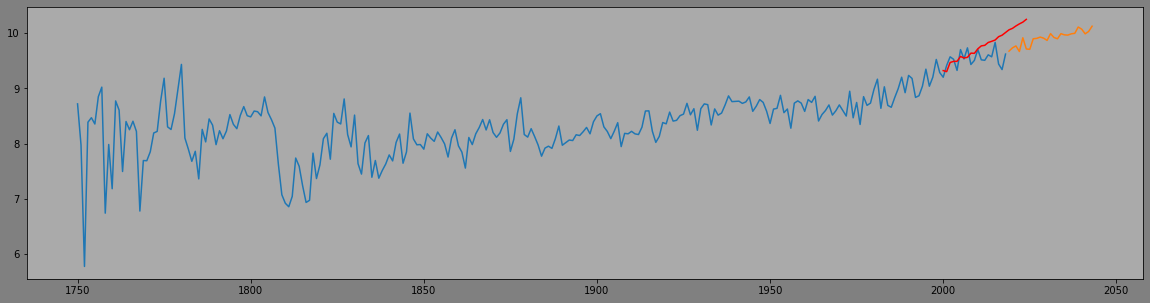

In [76]:
#from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#plot_acf(data_absolute_year)
#pyplot.show()
#plot_pacf(data_absolute_year)
#pyplot.show()

#ARIMA1=ARIMA(data_absolute_year,order=(25,2,0)).fit(disp=0)
data_test=data_absolute_year[:251]
#ARIMA2=ARIMA(data_test,order=(10,2,0)).fit(disp=0)
plt.figure(figsize=(20,5),facecolor="gray")
ax=plt.axes()
ax.set_facecolor("#AAAAAA")
forecast = ARIMA1.forecast(steps=25)[0]
forecast2 = ARIMA2.forecast(steps=25)[0]
ax.plot(data_absolute_year)
pred=[]
year=int(2019)
for i in range(len(forecast)):
    a=[]
    a+=[year]
    a+=[forecast[i]]
    pred+=[a]
    year+=1
pred
arr = np.array(pred)
a=pd.DataFrame(arr)
b=a.set_index(0)
ax.plot(b)

pred1=[]
year1=int(2000)
for i in range(len(forecast2)):
    a=[]
    a+=[year1]
    a+=[forecast2[i]]
    pred1+=[a]
    year1+=1
pred1
arr1 = np.array(pred1)
a1=pd.DataFrame(arr1)
b1=a1.set_index(0)
ax.plot(b1,"r")








This is where I define the function for ARIMA, so that I could quickly make predictions, starting from any year that I want.
The function takes a training set as the parameter, and then makes a prediction starting from the end year of the training set.

C:\Users\BlooD\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\BlooD\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


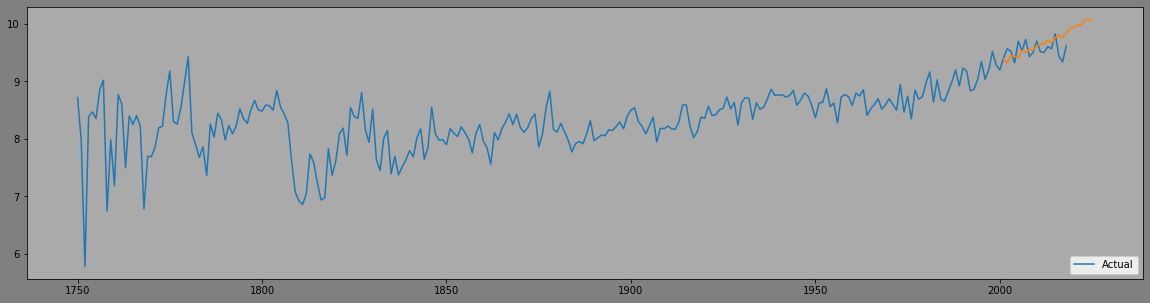

In [171]:
plt.figure(figsize=(20,5),facecolor="gray")
ax=plt.axes()
ax.set_facecolor("#AAAAAA")
ax.plot(data_absolute_year,label="Actual")
test2000=data_absolute_year[30:251]

def prediction(data,p,steps):
    year=2001
    arima=ARIMA(data,order=(p,2,0)).fit(disp=0)
    forecast=arima.forecast(steps=steps)[0]
    pred=[]
    for i in forecast:
        a=[]
        a+=[year]
        a+=[i]
        pred+=[a]
        year+=1
    arr=np.array(pred)
    a=pd.DataFrame(arr)
    b=a.set_index(0)
    return b
        
#ax.plot(prediction(test1900,10,25))


Prediction2000_p25=prediction(test2000,25,25)
ax.plot(Prediction2000_p25)
plt.legend(loc=4)
plt.show()

In this cell I use the pickle module to save and load ARIMA modles that take a lot of time to create.

In [170]:
import pickle
pickle.dump(Prediction2000_p20, open("2000-p20", 'wb'))

#loaded_model = pickle.load(open(filename, 'rb'))


